In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, f1_score, recall_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mja04\AppData\Local\Temp\ipykernel_7948\3129263893.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Loading the CSV file 
LCD = pd.read_csv('C:/Users/mja04/OneDrive/Data Science Capstone - MH/LCE.csv')

#Checking for missing values in each column
missing_values = LCD.isnull().sum()
print(missing_values)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


We can see that there is no missing values in this data. 

In [4]:
# Convert 'Male' to 1 and 'Female' to 0
LCD['GENDER'] = LCD['GENDER'].replace({'Male': 1, 'Female': 0})
print(LCD.head)

<bound method NDFrame.head of       GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0          1   65        1               1        1              0   
1          0   55        1               0        0              1   
2          0   78        0               0        1              1   
3          1   60        0               1        1              1   
4          0   80        1               1        0              1   
...      ...  ...      ...             ...      ...            ...   
2995       0   71        0               1        1              0   
2996       0   75        1               0        1              1   
2997       0   62        0               0        0              1   
2998       1   30        1               1        0              0   
2999       1   40        1               0        0              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0                   0        1        0         0        

We converted Gender into binary 0/1.

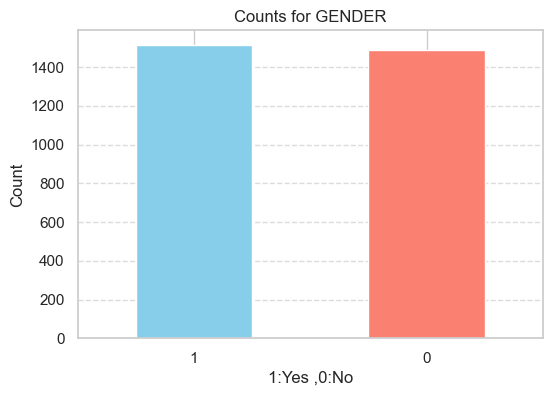

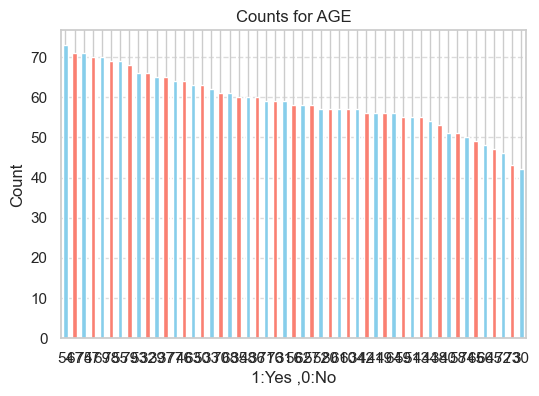

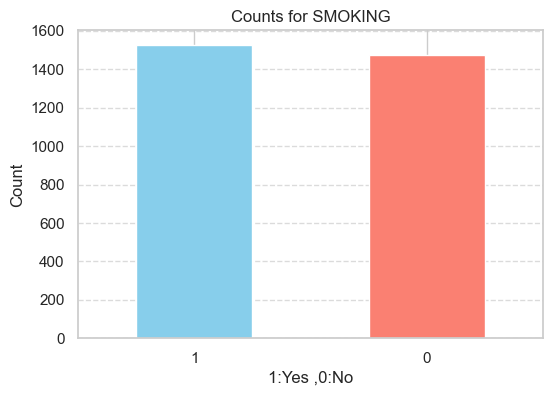

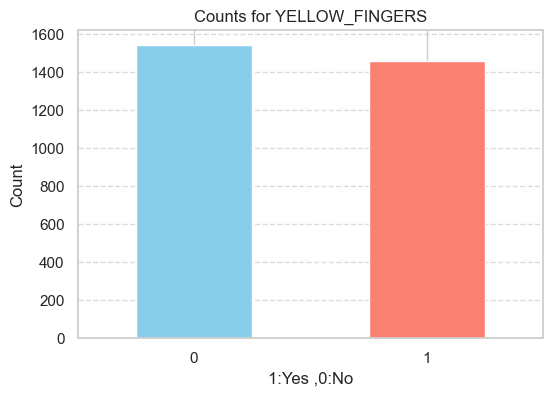

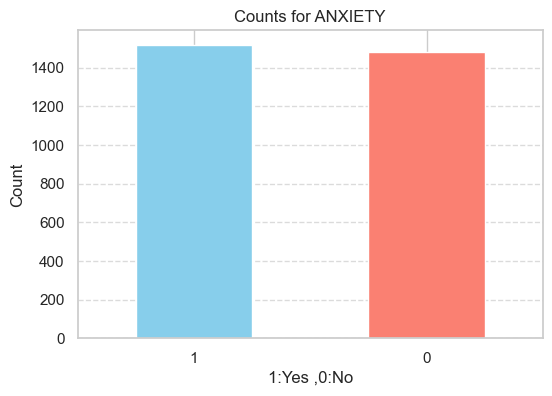

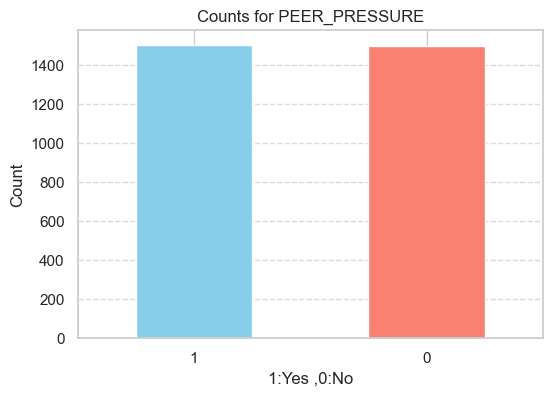

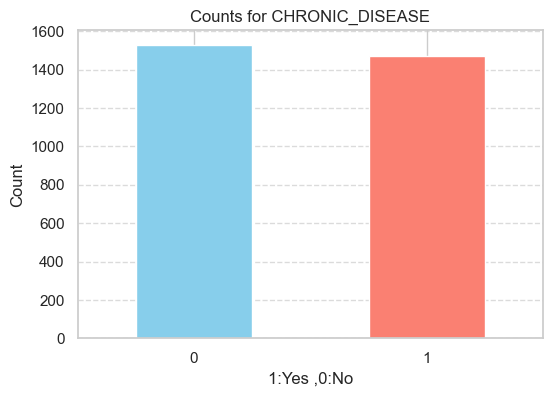

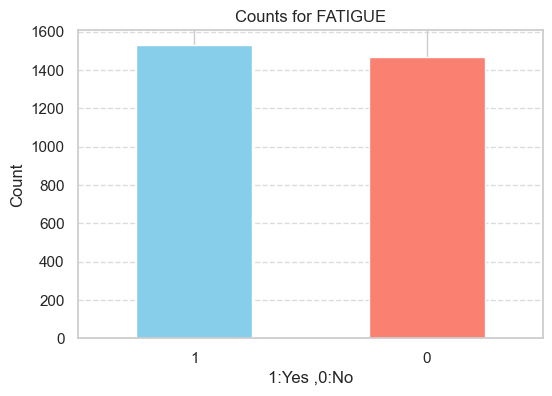

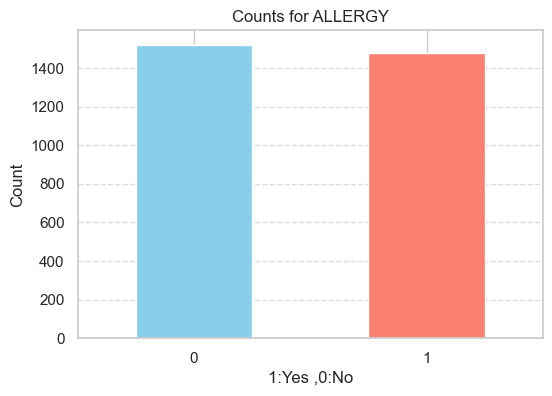

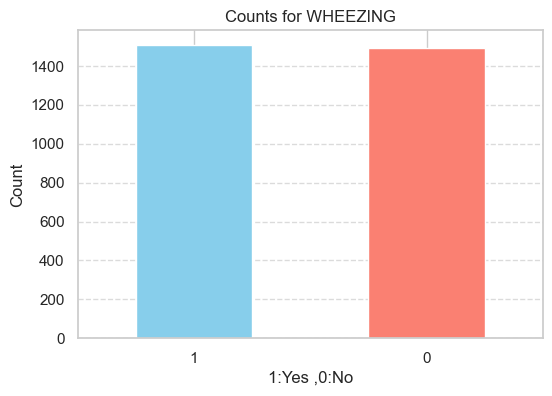

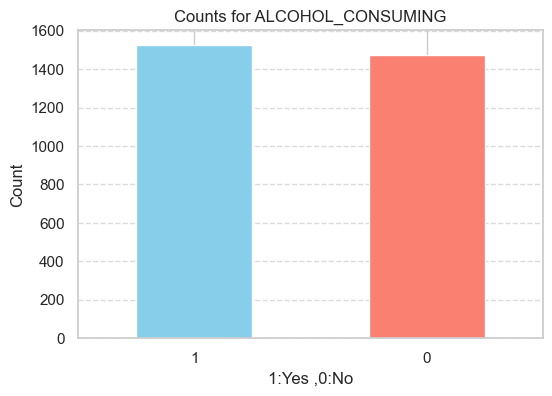

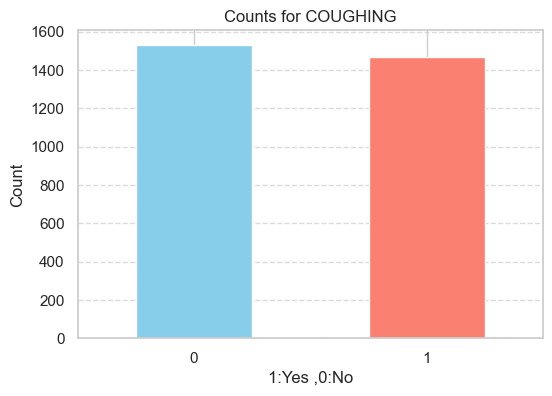

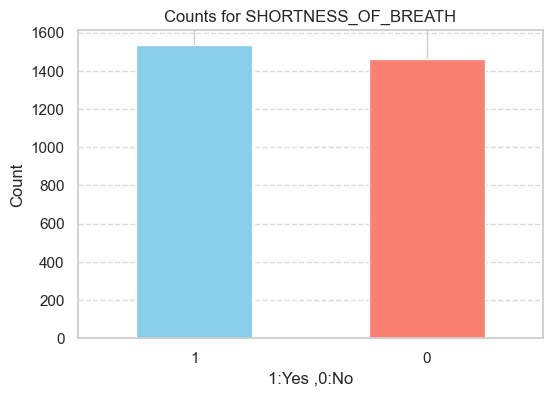

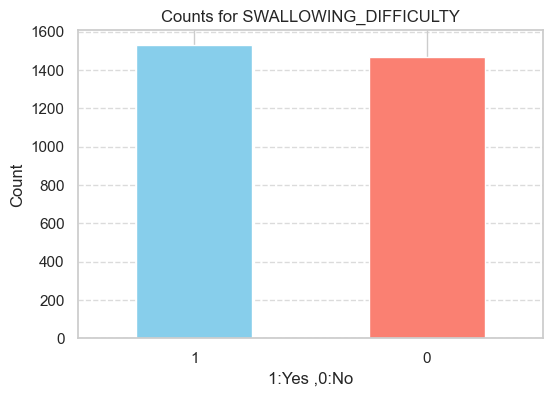

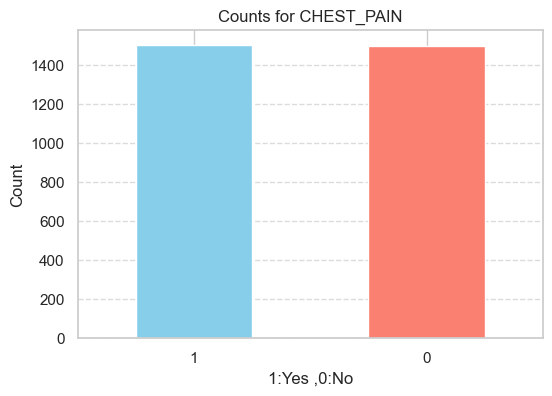

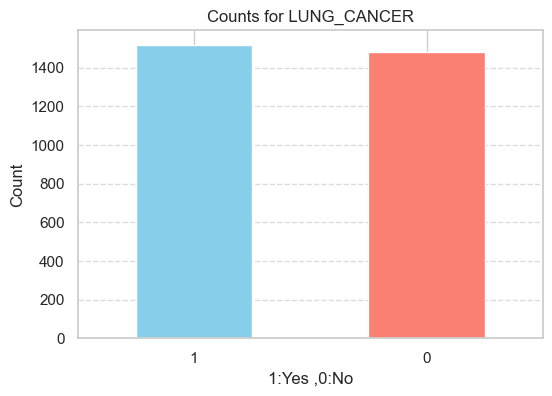

In [38]:
# Plot bar charts for each binary column
for col in LCD.columns:
    value_counts = LCD[col].value_counts()

    # Create a bar chart
    plt.figure(figsize=(6, 4))
    value_counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Counts for {col}')
    plt.xlabel('1:Yes ,0:No')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Keep x-axis labels horizontal
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


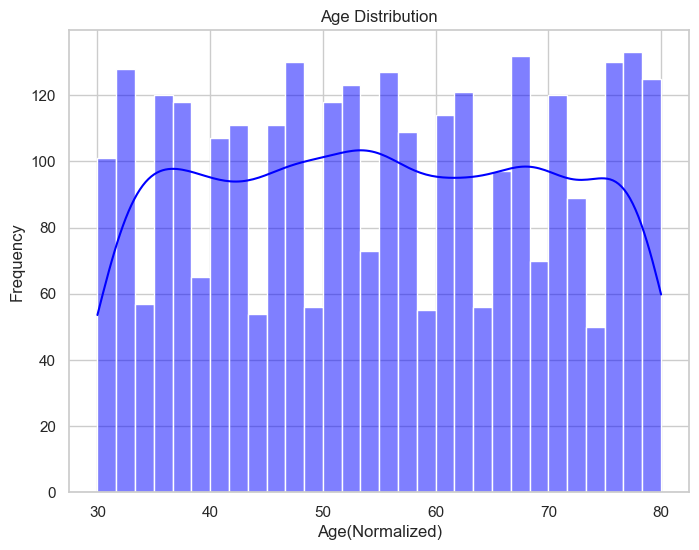

In [6]:
#Looking at Age's Distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(LCD['AGE'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age(Normalized)')
plt.ylabel('Frequency')
plt.show()

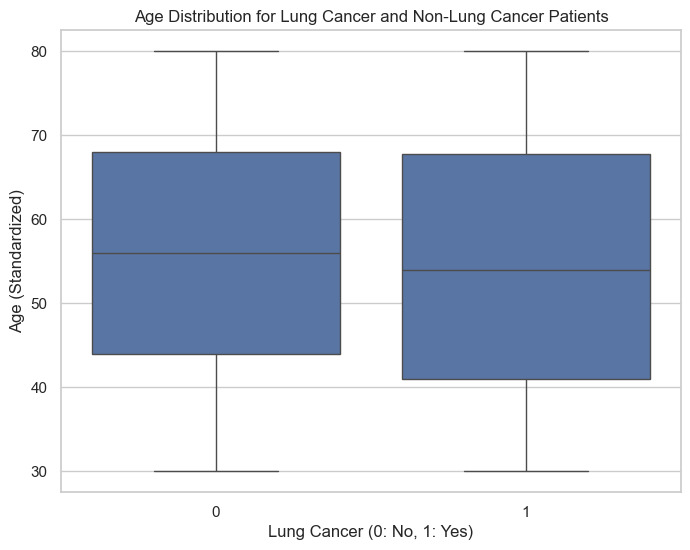

In [7]:
#Box Plot for Age vs Lung Cancer 

plt.figure(figsize=(8, 6))
sns.boxplot(x=LCD['LUNG_CANCER'], y=LCD['AGE'] )
plt.title('Age Distribution for Lung Cancer and Non-Lung Cancer Patients')
plt.xlabel('Lung Cancer (0: No, 1: Yes)')
plt.ylabel('Age (Standardized)')
plt.show()

C:\Users\mja04\AppData\Local\Temp\ipykernel_7948\2294491264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SMOKING', data=LCD, palette='Set1')


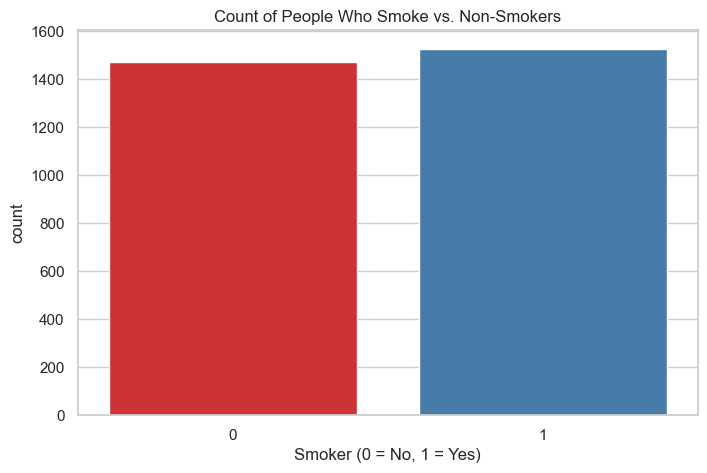

In [8]:
#Bar plot for Smoking 
plt.figure(figsize=(8, 5))
sns.countplot(x='SMOKING', data=LCD, palette='Set1')
plt.title('Count of People Who Smoke vs. Non-Smokers')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.show()

C:\Users\mja04\AppData\Local\Temp\ipykernel_7948\3580378025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LUNG_CANCER', data=LCD, palette='Set1')


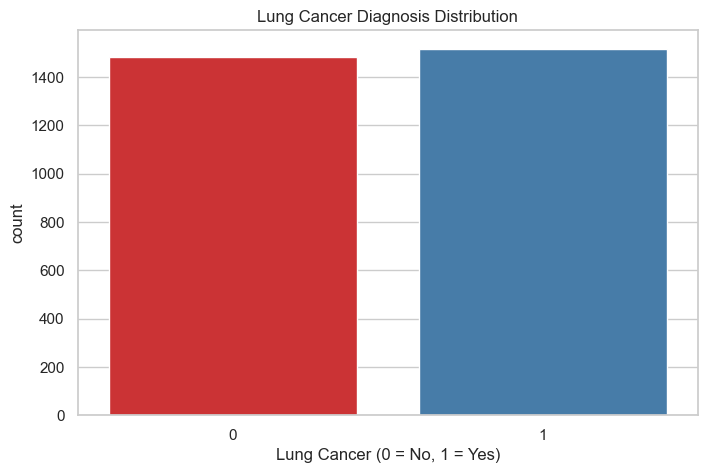

In [9]:
#Bar plot for LUNG_CANCER
plt.figure(figsize=(8, 5))
sns.countplot(x='LUNG_CANCER', data=LCD, palette='Set1')
plt.title('Lung Cancer Diagnosis Distribution')
plt.xlabel('Lung Cancer (0 = No, 1 = Yes)')
plt.show()

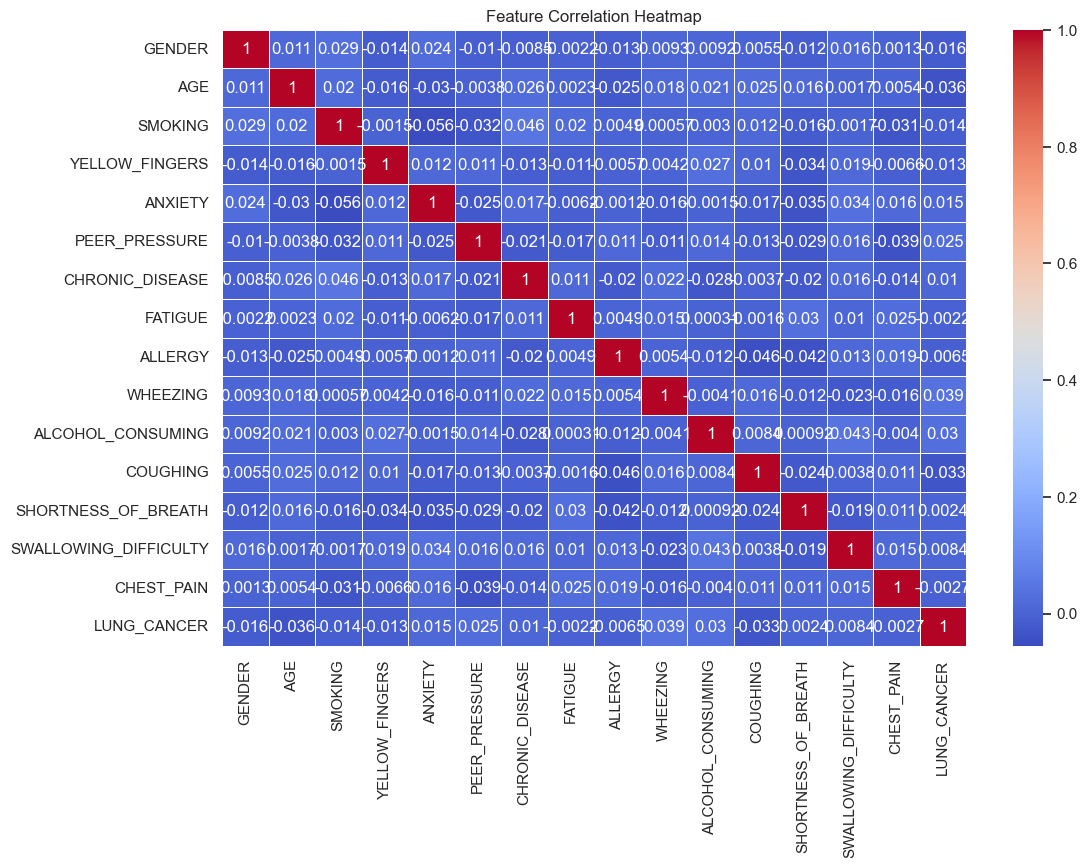

In [10]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = LCD.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

It doesnt seem like there is much to be said for this correlation matrix. 

In [11]:
#Here we are splitting our data into training and test. 

# X: Features, Y: Lung Cancer 

#Selecting the first 14 for features 
X = LCD.iloc[:,:14]

#Selecting Lung Cancer 
Y = LCD.iloc[:, 15]

#Normalization of age 

from sklearn import preprocessing
 #normalizing training data for svm/knn
normalizer = preprocessing.Normalizer()
XN = normalizer.fit_transform(X)
XN

#Splitting data into training and testing sets (80%/20%)
X_train, X_test, Y_train, Y_test = train_test_split(XN, Y, test_size=0.2, random_state=123)

# Print shapes of the resulting datasets to verify
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print(Y)

(2400, 14) (600, 14) (2400,) (600,)
0       0
1       0
2       1
3       1
4       0
       ..
2995    0
2996    0
2997    1
2998    1
2999    1
Name: LUNG_CANCER, Length: 3000, dtype: int64


In [12]:
#First interation Random Forest

# Training the Random Forest classifier
RFC = RandomForestClassifier(n_estimators=12, max_depth=3, random_state=123)
RFC.fit(X_train, Y_train)

# Predict on the training data
clf_train_pred = RFC.predict(X_train)

# Calculate accuracy on the training data
accuracy_train = accuracy_score(Y_train, clf_train_pred)
print(f'Accuracy on Train: {accuracy_train * 100:.2f}%')
#This is found to be our best model on the training data so far 


Accuracy on Train: 58.33%


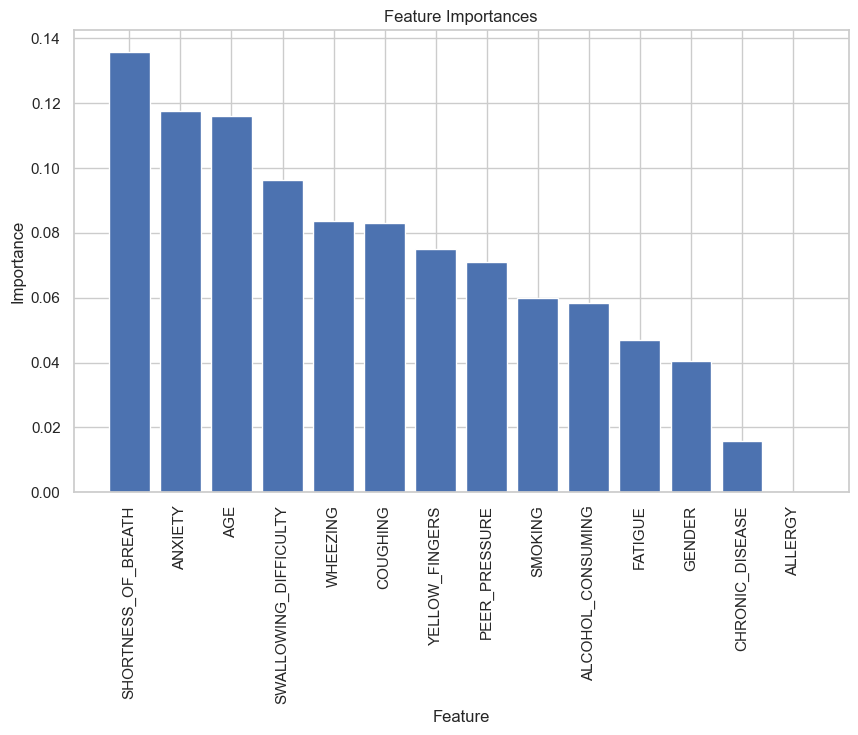

In [13]:
#ploting the features importances to get a better understanding of the variables.
importances = RFC.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the features by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(LCD.columns)[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


We can see that shortness of breath, anxiety, age are the top three features in terms of importance. 

In [14]:
#Training the model on test data for Random Forest to see difference in scores. 
RFC2 = RandomForestClassifier(n_estimators=12, max_depth=3, random_state=123)
RFC2.fit(X_train, Y_train)

# Predict on the training data
RFC2_pred = RFC2.predict(X_test)

# Calculate accuracy on the training data
accuracy_train2 = accuracy_score(Y_test, RFC2_pred)
print(f'Accuracy on Training Data: {accuracy_train * 100:.2f}%')

#the accuracy is same as on the training set 

Accuracy on Training Data: 58.33%


In [15]:
#SVM on test 
modelSVC = SVC(probability = True)
modelSVC.fit(X_train, Y_train)
SVM_pred = modelSVC.predict(X_test)

accuracy = accuracy_score(Y_test, SVM_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# With the standarized data we only achieve an increase of about 6-8%. 
# 
# Should we be normalizing all of x train or only age?

Accuracy: 51.50%


In [16]:
#Decision Tree model on test

dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, dt_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 50.17%


In [17]:
#Gradient Boosting on train 

# Initialize Gradient Boosting model
GBmodel = GradientBoostingClassifier()
GBmodel.fit(X_train, Y_train)

# Make predictions on the test set
GB_pred = GBmodel.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(Y_train, GB_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 71.25%


In [18]:
#Gradient Boosting on test 

# Initialize Gradient Boosting model
GBmodel = GradientBoostingClassifier()
GBmodel.fit(X_train, Y_train)

# Make predictions on the test set
GB_pred = GBmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, GB_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#We see a significant drop in accuracy with this model. 

Accuracy: 52.83%


In [19]:
#KNN Model on train 
knn = KNeighborsClassifier(n_neighbors=20)
# Train the model
knn.fit(X_train, Y_train)
# Make predictions on the test data
knn_pred = knn.predict(X_train)
# Evaluate the model
accuracy = accuracy_score(Y_train, knn_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Here we can see that on the training data the model performs pretty well with an accuracy of about 58%

Accuracy: 58.33%


In [20]:
#KNN Model on test 
knn = KNeighborsClassifier(n_neighbors=20)
# Train the model
knn.fit(X_train, Y_train)
# Make predictions on the test data
knn_pred = knn.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, knn_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Here we again see that the accuracy of the model drops between training and test sets meaning the models arent doing a good job classifying the variables. 

Accuracy: 51.33%


In [21]:
#Logistic Regression on training 
# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(max_iter=50, random_state=123)
LR_model.fit(X_train, Y_train)
# Make predictions on the training data
LR_pred = LR_model.predict(X_train)
# Evaluate the model
accuracy = accuracy_score(Y_train, LR_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Here we can see that we got only a 52.25% accruacy on this model. This model wont change accuracy when i change the max interation parameters.

Accuracy: 52.25%


In [22]:
#Logistic Regression on test 
# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(max_iter=50, random_state=123)
LR_model.fit(X_train, Y_train)
# Make predictions on the test data
LR_pred = LR_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, LR_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#here we again see that the models accuracy is dropping by a good 3-4 percent while also already being a bad accuracy rate. 

Accuracy: 49.83%


In [23]:
#currently this regression tree isnt working. 
#Regression Tree
#Initialize the DecisionTreeRegressor (Regression Tree)
#RT_model = DecisionTreeRegressor(random_state=42)
#RT_model.fit(X_train, Y_train)
# Make predictions on the test data
#RT_pred = RT_model.predict(X_test)
#accuracy = accuracy_score(Y_test, RT_pred)
#print(f'Accuracy: {accuracy * 100:.2f}%')

Correlation Matrix of Model Predictions:
                    DecisionTree       KNN  LogisticRegression  \
DecisionTree            1.000000  0.067864           -0.019095   
KNN                     0.067864  1.000000            0.102177   
LogisticRegression     -0.019095  0.102177            1.000000   
GradientBoosting        0.191935  0.112443            0.145893   
SVM                          NaN       NaN                 NaN   
RandomForest            0.151634  0.182431            0.313518   

                    GradientBoosting  SVM  RandomForest  
DecisionTree                0.191935  NaN      0.151634  
KNN                         0.112443  NaN      0.182431  
LogisticRegression          0.145893  NaN      0.313518  
GradientBoosting            1.000000  NaN      0.397494  
SVM                              NaN  NaN           NaN  
RandomForest                0.397494  NaN      1.000000  


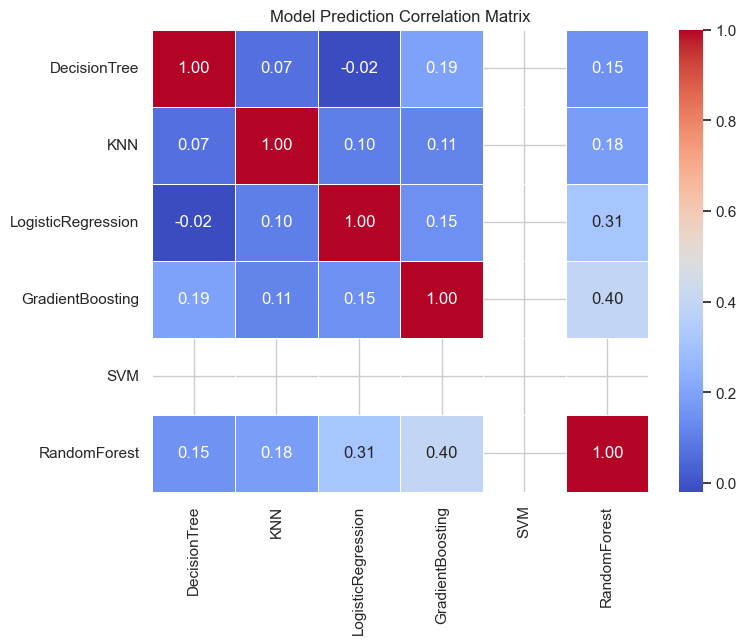

In [24]:
import seaborn as sns
# Combine the predictions into a DataFrame for comparison
predictions_df = pd.DataFrame({
    'DecisionTree': dt_pred,
    'KNN': knn_pred,
    'LogisticRegression': LR_pred,
    'GradientBoosting': GB_pred,
    'SVM': SVM_pred,
    'RandomForest': RFC2_pred
})

# Compute the correlation matrix of the model predictions
pred_corr_matrix = predictions_df.corr()

# Display the correlation matrix
print("Correlation Matrix of Model Predictions:")
print(pred_corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pred_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Model Prediction Correlation Matrix')
plt.show()


Seeing what to do for voting classifyer 

In [25]:

from sklearn.ensemble import VotingClassifier

# Define individual models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
dt = DecisionTreeClassifier()
svm = SVC(probability=True)  # Enable probabilities for soft voting
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()


# Combine into a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('svm', svm), ('knn', knn),('rf', rf),('gb', gb),('lr', lr), ],
    voting='soft'  # Use 'hard' for majority voting
)

# Train the ensemble
voting_clf.fit(X_train, Y_train)

# Evaluate the ensemble
print("Ensemble Accuracy:", voting_clf.score(X_test, Y_test))

#This model performed best with the following models decision tree , svm , knn, random forest. 

Ensemble Accuracy: 0.515


Need to do a NN

In [26]:
#Recursive Feature Elimination not fully completed need to adjust the code.

In [27]:
#RFE on Logistic Regression

# Create an RFE selector and fit to training data
rfe = RFE(estimator=LR_model, n_features_to_select=5)  # Keep 5 features
rfe.fit(X_train, Y_train)


# Get the list of selected features
selected_features = np.where(rfe.support_)[0]
print("Indices of selected features:", selected_features)

# Train the model using the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Fit the model
LR_model.fit(X_train_selected, Y_train)

# Make predictions
LR_pred = LR_model.predict(X_test_selected)

# Evaluate performance (accuracy for classification or MSE for regression)
accuracy = accuracy_score(Y_test, LR_pred)  # Or use other metrics for regression
print("Model Accuracy with selected features:" ,accuracy *100)

Indices of selected features: [ 4  5  9 10 12]
Model Accuracy with selected features: 49.833333333333336


In [28]:
#RFE on Random Forest
#Needs rebuilding 


# Create an RFE selector and fit to training data
#rfe = RFE(estimator=RFC, n_features_to_select=5)  # Keep 5 features
#rfe.fit(X_train, Y_train)


# Get the list of selected features
#selected_features = np.where(rfe.support_)[0]
#print("Indices of selected features:", selected_features)



# Train the model using the selected features
#X_train_selected = X_train[:, selected_features]?
#X_test_selected = X_test[:, selected_features]

# Fit the model
#RFC.fit(X_train_selected, Y_train)

# Make predictions
#clf_pred = RFC.predict(X_test_selected)

# Evaluate performance (accuracy for classification or MSE for regression)
#accuracy = accuracy_score(Y_test, clf_pred)  # Or use other metrics for regression
#print("Model Accuracy with selected features:", accuracy)

In [29]:
#RFE on Gradient Boosting


# Create an RFE selector and fit to training data
rfe = RFE(estimator=GBmodel, n_features_to_select=5)  # Keep 5 features
rfe.fit(X_train, Y_train)


# Get the list of selected features
selected_features = np.where(rfe.support_)[0]
print("Indices of selected features:", selected_features)

# Train the model using the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

#Fit the model
GBmodel.fit(X_train_selected, Y_train)

# Make predictions
GB_pred = GBmodel.predict(X_test_selected)

# Evaluate performance (accuracy for classification or MSE for regression)
accuracy = accuracy_score(Y_test, GB_pred)  # Or use other metrics for regression
print("Model Accuracy with selected features:", accuracy*100)

Indices of selected features: [ 0  1  6  7 10]
Model Accuracy with selected features: 54.833333333333336


In [30]:
# Bagging

In [31]:
#Bagging on Decision Tree Model

# Initialize Bagging with the base model for classification
DT_bagging_model = BaggingClassifier(estimator=dt_model, n_estimators=50, random_state=42)

# Train the Bagging model
DT_bagging_model.fit(X_train, Y_train)

# Predict on the test set
DT_pred = DT_bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, DT_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.2f}")


Accuracy of Bagging Classifier: 0.52


In [32]:
#Bagging on KNN

# Initialize Bagging with the base model for classification
KNN_bagging_model = BaggingClassifier(estimator=knn, n_estimators=50, random_state=42)

# Train the Bagging model
KNN_bagging_model.fit(X_train, Y_train)

# Predict on the test set
KNN_pred = KNN_bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, KNN_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.2f}")

Accuracy of Bagging Classifier: 0.52


In [33]:
#Bagging on SVM


# Initialize Bagging with the base model for classification
SVM_bagging_model = BaggingClassifier(estimator=modelSVC, n_estimators=50, random_state=42)

# Train the Bagging model
SVM_bagging_model.fit(X_train, Y_train)

# Predict on the test set
SVM_pred = SVM_bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, SVM_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.2f}")

Accuracy of Bagging Classifier: 0.51
